In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow import keras 

In [3]:
data=np.loadtxt("/home/sahil/Desktop/UGP(JUN)/Exp1/contacts.Exp1.dat")
print("shape of data:",data.shape)

print("datatype of data:",data.dtype)

max_time=np.amax(data,axis=0)
print("max_time: ",max_time[3])

matrix=np.zeros((9,int(max_time[3])))

print("shape of matrix:",matrix.shape)

print("datatype of matrix:",matrix.dtype)

for x in range(9):
    for n in range(data.shape[0]):
        if data[n,0]==x+1:
            for a in range(int(data[n,2]),int(data[n,3])):
                matrix[x,a]=1
average=np.average(matrix,axis=1)
print("Mean Probablity of connection:",average)

shape of data: (2766, 6)
datatype of data: float64
max_time:  359311.0
shape of matrix: (9, 359311)
datatype of matrix: float64
Mean Probablity of connection: [0.72765933 0.17408039 0.49250927 0.16353243 0.06168194 0.27361255
 0.56315838 0.1666495  0.66885511]


Which node would you like to check? 1
Estimated coefficients:
b_0 = 0.10220071185550283  \ 
b_1 = 4.000984158313448e-07


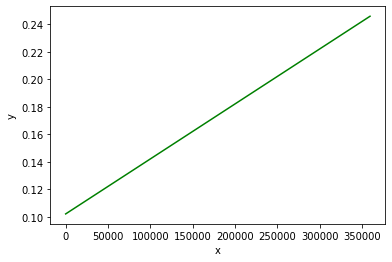

In [4]:
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    #plt.scatter(x, y, color = "m", 
    #           marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    
    for n in range(359311):
        if (y_pred[n]<0):
            y_pred[n]=0
        if (y_pred[n]>1):
            y_pred[n]=1
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
  
    # function to show plot 
    plt.show()
a=input("Which node would you like to check? ")
x=np.arange(0,int(max_time[3]))
y=matrix[int(a),]
# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
    # plotting regression line 
plot_regression_line(x, y, b) 

In [43]:
# only counting the internal nodes
data_internal = data[np.logical_not(data[:,1]>9)]
print("shape of new data:",data_internal.shape)
max_time=np.amax(data_internal,axis=0)[3]
print(max_time)
#make data suitable for neutral network
a=input("first node ")
b=input("corresponding node ")
dataset_temp=data_internal[np.logical_not(np.logical_or(data_internal[:,0] !=int(a), data_internal[:,1] != int(b)))]
max_time=np.amax(dataset_temp,axis=0)[3]
print(max_time)
#shift arrays' columns as we need our inputs on left side
i=[0,1,4,5,2,3]
dataset_temp=dataset_temp[:,i]
#convert into probablity matrix suitable for model
dataset=np.zeros((int(max_time),5))
for r in range(int(max_time)):
    for m in range(dataset_temp.shape[0]):
        dataset[r,0]=dataset_temp[m,0]
        dataset[r,1]=dataset_temp[m,1]
        if dataset_temp[m,4] == r:
            for n in range(int(dataset_temp[m,4]) , int(dataset_temp[m,5])):
                dataset[n,2]=dataset_temp[m,2]
                dataset[n,3]=dataset_temp[m,3]
                dataset[n,4]=1


print(dataset)

shape of new data: (1364, 6)
359311.0
first node 1
corresponding node 2
115336.0
[[1. 2. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 ...
 [1. 2. 0. 0. 0.]
 [1. 2. 0. 0. 0.]
 [1. 2. 0. 0. 0.]]


In [45]:
# neutal-network

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
#dataframe = pandas.read_csv("/home/sahil/Desktop/UGP(JUN)/Exp1/contacts.Exp1.dat", delim_whitespace=True, header=None)
#dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[0:20000,0:4]
Y = dataset[0:20000,4]

In [9]:
#this model is not recommended to run due to compiling time
# define wider model
def wider_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print(X)

KeyboardInterrupt: 

In [29]:
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Larger: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Larger: -0.00 (0.00) MSE


In [28]:
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=4, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.00 (0.00) MSE


In [48]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# make class predictions with the model
predictions = model.predict_classes(X)
# summarize some cases
for i in range(18020,18030):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], Y[i]))

[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 5.0, 7104.0] => 1 (expected 1)
[1.0, 2.0, 0.0, 0.0] => 0 (expected 0)
